In [1]:
#ingest the data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data=pd.read_csv(r"E:\endtoendpost\notebooks\data\dataset1.csv")

In [4]:
# Clean up column names
data.columns = data.columns.str.strip()

In [5]:
# Display the first few rows of the DataFrame
data.head()

,Facebook Post,Emotion,User ID
0,Feeling happy today! :),Happy,123456
1,Had a tough day at school. :(,Sad,789012
2,Excited for the weekend!,Excited,456789
3,Annoyed with the traffic today.,Annoyed,345678
4,"Celebrating my birthday today! :D""",Happy,890123


In [6]:
# Basic statistics of the dataset
data.describe()

,User ID
count,11.000000
mean,656475.454545
std,255091.487287
min,123456.000000
25%,512339.500000
50%,789012.000000
75%,839567.500000
max,901234.000000


In [7]:
# Count of each emotion
emotion_counts = data['Emotion'].value_counts()

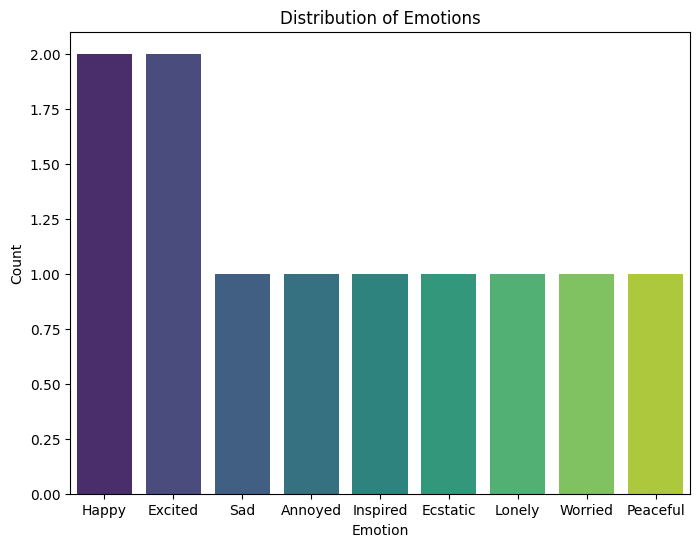

In [8]:
# Plot the count of each emotion
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [9]:
# Word cloud for Facebook posts
text = ' '.join(data['Facebook Post'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

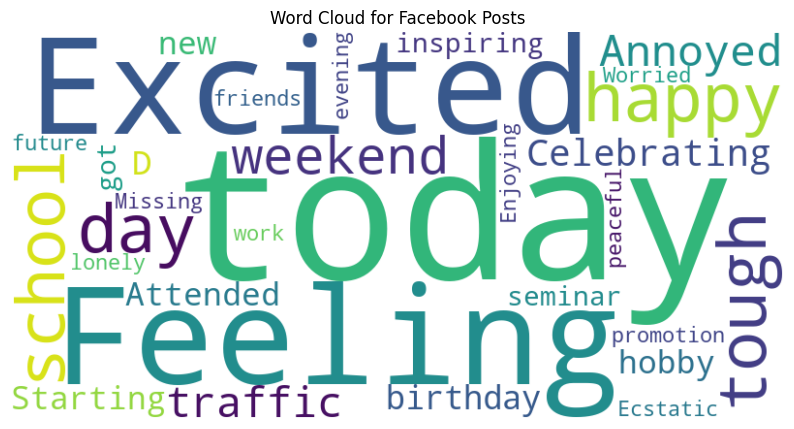

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Facebook Posts')
plt.show()

In [11]:
# Post length analysis
data['Post Length'] = data['Facebook Post'].apply(len)

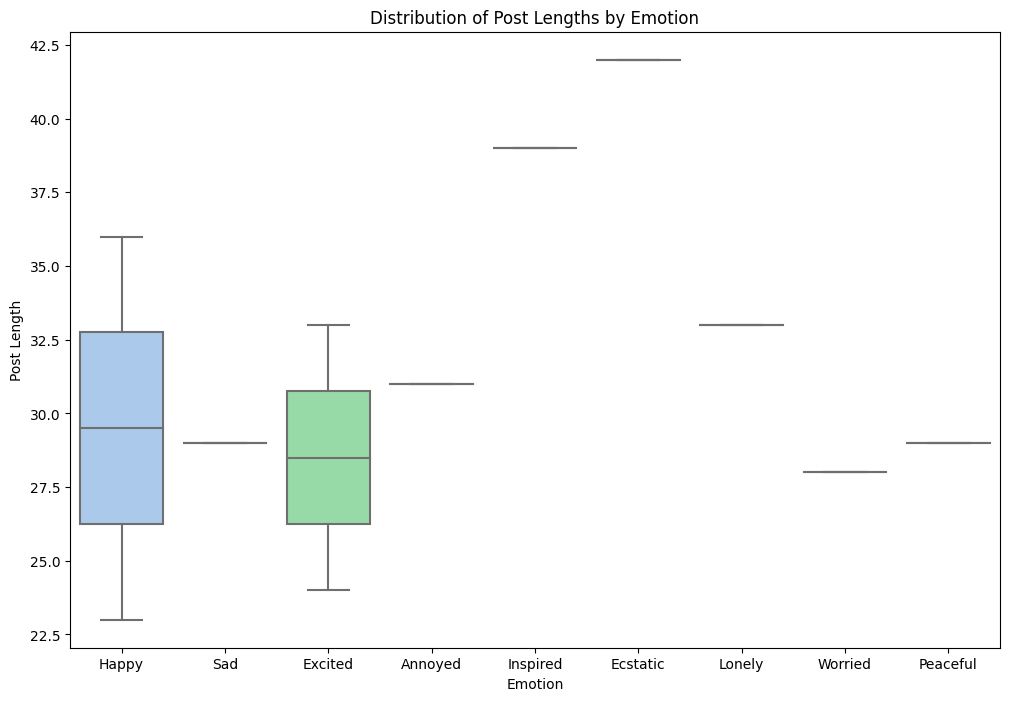

In [12]:
# Plot distribution of post lengths by emotion
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion', y='Post Length', data=data, palette='pastel')
plt.title('Distribution of Post Lengths by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Post Length')
plt.show()


In [13]:
#model training
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Split the data into features (X) and target variable (y)
X = data['Facebook Post']
y = data['Emotion']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [17]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [18]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [20]:
# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

     Excited       0.50      1.00      0.67         1
       Happy       1.00      1.00      1.00         1
     Worried       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Confusion Matrix:
 [[1 0 0]
 [0 1 0]
 [1 0 0]]


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
# Identify categorical and numerical features
categorical_features = ['Facebook Post']
numerical_features = ['User ID']


In [25]:
# Create transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

In [26]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [27]:
# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])


In [29]:
# Create a pipeline with the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  MultinomialNB())
])